In [13]:
import maboss
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [4]:
bnd = 'ICD_ExtendV2.bnd'
cfg = 'ICD_ExtendV2.cfg'
upp = 'ICD_ExtendV2.upp'

In [5]:
sim = maboss.load(bnd,cfg)

In [7]:
big_sim = maboss.UpdatePopulation(sim,upp)

In [9]:
start = time.time()
res = big_sim.run()
stop = time.time()
duration = (stop-start)/60
print("exec. time: ",duration," mins")

16.73235864639282

In [11]:
table = res.get_nodes_stepwise_probability_distribution(('P2Y2R','P2X7R','LRP1','FPR1','TLR4','IFN1_rec','CXCR3','CD28','IFNg_rec','TCR_I','TCR_II','IL1B_rec','IL2_rec','IL4_rec','IL6_rec','IL12_rec','IL17_rec','TGFb_rec','Tumor','Death','Division','act_cd4','DC','aDC','cd4','cd8','Th1','Th2','Th17','Treg','preCTL','CTL','ANXA1_o','ATP_o','CALR_o','HMGB1_o','IFN1_o','CD80_o','CXCL10_o','MHC_I','IL1B_o','IL2_o','IL4_o','IL6_o','IL12_o','IL17_o','IFNg_o','TGFb_o','Perforin_o'))

In [14]:
sns.set_style("white")
colormap_scale = sns.light_palette("black", as_cmap=True)
colormap_ratios = sns.diverging_palette(240, 0, center='light', as_cmap=True)
def save_figure(figure, title):
    #figure.savefig("%s.png" % title, bbox_inches="tight")
    figure.savefig("%s.pdf" % title, bbox_inches="tight")

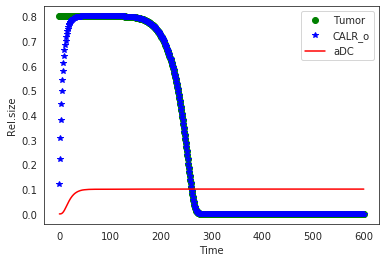

In [15]:
adc = plt.figure()
plt.plot(table['PopRatio']*table['Tumor'],'og',label="Tumor")
plt.plot(table['PopRatio']*table['CALR_o'],'*b',label="CALR_o")
plt.plot(table['PopRatio']*table['aDC'],'-r',label="aDC")
plt.ylabel("Rel.size")
plt.xlabel("Time")
plt.legend()
save_figure(adc,"aDC_Tumor_CALR")

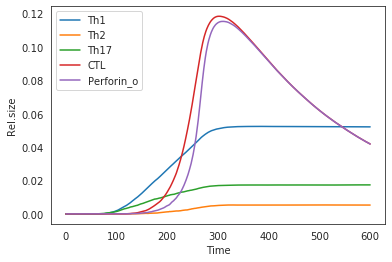

In [16]:
Tcells = plt.figure()
plt.plot(table['PopRatio']*table['Th1'],label="Th1")
plt.plot(table['PopRatio']*table['Th2'],label="Th2")
plt.plot(table['PopRatio']*table['Th17'],label="Th17")
plt.plot(table['PopRatio']*table['CTL'],label="CTL")
plt.plot(table['PopRatio']*table['Perforin_o'],label="Perforin_o")
plt.ylabel("Rel.size")
plt.xlabel("Time")
plt.legend()
save_figure(Tcells,"Tcells")